In [1]:
from visualize import *

In [2]:
def H_two_body(q, p):
    # Constants
    G = 1.0
    m1 = 1.0
    m2 = 1.0
    mu = (m1 * m2) / (m1 + m2)
    M = m1 + m2

    # Relative distance
    R = np.sqrt(q**2)
    K = (p**2) / (2 * mu)
    V = -G * M * mu / R
    H = K + V
    return H

def H_pendulum(q, p):
    m, l, g = 1.0, 1.0, 9.81
    return p**2 / (2 * m * l**2) - m * g * l * np.cos(q)

def H_windy_pendulum(t, q, p):
    m, l, g = 1.0, 1.0, 9.81   
    F0, omega = 1.0, 1.0
    F_ext = F0 * np.sin(omega * t) 
    return p**2 / (2 * m * l**2) - m * g * l * np.cos(q) - q * F_ext

def H_double_pendulum(self, t, z):
    q1, q2, p1, p2 = z[:, 0], z[:, 1], z[:, 2], z[:, 3]
    delta = q2 - q1
    D = 2 * self.L1**2 * self.L2**2 * (self.m1 + self.m2 * (1 - torch.cos(delta)**2))
    num = (self.m2 * self.L2**2 * p1**2 + (self.m1 + self.m2) * self.L1**2 * p2**2 -
            2 * self.m2 * torch.cos(delta) * self.L1 * self.L2 * p1 * p2)
    V = -(self.m1 + self.m2) * 9.81 * self.L1 * torch.cos(q1) - self.m2 * 9.81 * self.L2 * torch.cos(q2)
    return num / D + V

def H_spring(q, p):
    k, m = 1.0, 1.0
    return 0.5 * k * q**2 + 0.5 * p**2 / m

def H_forced_spring(t, q, p):
    k, m = 1.0, 1.0
    F0, omega = 1.0, 1.0
    F_ext = F0 * np.sin(omega * t) * np.sin(2 * omega * t)
    return 0.5 * k * q**2 + 0.5 * p**2 / m - q * F_ext

def H_henon_heiles(q, p):
    q1, p1 = 1.0, 1.0
    q2, p2 = q, p
    a = 1.0
    H = 0.5 * (q1 ** 2 + q2 ** 2) +  0.5 * (p1 ** 2 + p2 ** 2) + a * (q1 * q1 * q2 - q2 ** 3 / 3.0)
    return H

def H_duffing_unforced(t, q, p):
    alpha, beta, m = -1.0, 1.0, 1.0
    f = 0
    omega = 1.2
    F_ext = f * np.sin(omega * t)
    return 0.5 * alpha * q**2 + 0.25 * beta * q**4 + 0.5 * p**2 / m - q * F_ext


def H_duffing_unforced(q, p):
    alpha, beta, m = -1.0, 1.0, 1.0
    return 0.5 * alpha * q**2 + 0.25 * beta * q**4 + 0.5 * p**2 / m


def H_duffing(t, q, p):
    alpha, beta, m = -1.0, 1.0, 1.0
    f = 0.2
    omega = 1.2
    F_ext = f * np.sin(omega * t)
    return 0.5 * alpha * q**2 + 0.25 * beta * q**4 + 0.5 * p**2 / m - q * F_ext

def H_duffing_chaotic(t, q, p):
    alpha, beta, m = -1.0, 1.0, 1.0
    f = 0.39
    omega = 1.4
    F_ext = f * np.sin(omega * t)
    return 0.5 * alpha * q**2 + 0.25 * beta * q**4 + 0.5 * p**2 / m - q * F_ext

def H_two_body_fake_time(t, q, p):
    return H_two_body(q, p)

In [3]:
plot_phase_map(
    qs = np.linspace(-1.0, 1.0, 500),
    ps = np.linspace(-1.0, 1.0, 500),
    energy_func = H_duffing_unforced,
    title="",
    q_spec_label="(position)",
    p_spec_label="(momentum)",
    save_fig= True, 
    figure_path="../../visualizations/phase_maps/unforced_duffing_true"
)

In [6]:
plot_phase_map(
    qs = np.linspace(-1.0, 1.0, 500),
    ps = np.linspace(-1.0, 1.0, 500),
    energy_func = H_pendulum,
    title="",
    q_spec_label="(position)",
    p_spec_label="(momentum)",
    save_fig= True, 
    figure_path="../../visualizations/phase_maps/damped_pendulum_true"
)

In [5]:
plot_phase_map(
    qs = np.linspace(-1.0, 1.0, 500),
    ps = np.linspace(-1.0, 1.0, 500),
    energy_func = H_spring,
    title="",
    q_spec_label="(position)",
    p_spec_label="(momentum)",
    save_fig= True, 
    figure_path="../../visualizations/phase_maps/damped_spring_true"
)

In [6]:
plot_port_Hamiltonian(
    qs = np.concat((np.linspace(-5.0, -0.001, 500), np.linspace(0.001, 5.0, 500))),
    ps = np.linspace(-2.0, 2.0, 500),
    energy_func=H_two_body_fake_time,
    levels = np.linspace(-4.0, 4.0, 60),
    seed_points= [[-4,0.5],[-1,-1],[4,-0.5],[1,1]],
    save_fig=True,
    T=2.0,
    figure_path='../visualizations/two_body_phase_plot'
)


(None, None)

In [7]:
plot_stream_lines(
    qs = np.linspace(-2.0, 2.0, 200),
    ps = np.linspace(-2.0, 2.0, 200),
    energy_func=H_henon_heiles,
    title="Phase Space Energy of Hénon-Helies System ($q_1=p_1=1.0$)",
    q_spec_label="_2(position)",
    p_spec_label="_2(momentum)",
    gamma= 0.0,
    ax = None,
    fig = None,
    save_fig=True,
    figure_path='../visualizations/HH_phase_plot'
)

(None, None)

In [8]:
plot_port_Hamiltonian(
    qs = np.linspace(-2.0, 2.0, 200),
    ps = np.linspace(-2.0, 2.0, 200),
    energy_func=H_duffing,
    title="Phase Space Energy of Duffing System (Non-Chaotic regime)",
    q_spec_label="(displacement)",
    p_spec_label="(momentum)",
    gamma= 0.3,
    T=10.0,
    seed_points= [[1.5,1.5],[-1.5,1.5],[-1.5,-1.5],[1.5,-1.5]],
    quiver_scale = 5.0,
    save_fig=True,
    figure_path='../visualizations/duffing_phase_plot'
)

In [ ]:
plot_port_Hamiltonian(
    qs = np.linspace(-2.0, 2.0, 200),
    ps = np.linspace(-2.0, 2.0, 200),
    energy_func=H_duffing_unforced,
    title="Phase Space Energy of Duffing System (Non-Chaotic regime, No Forcing)",
    q_spec_label="(displacement)",
    p_spec_label="(momentum)",
    gamma= 0.3,
    T=10.0,
    seed_points= [[1.5,1.5],[-1.5,1.5],[-1.5,-1.5],[1.5,-1.5]],
    quiver_scale = 5.0,
    save_fig=True,
    figure_path='../visualizations/duffing_unforced_phase_plot'
)

In [10]:
plot_port_Hamiltonian(
    qs = np.linspace(-2.0, 2.0, 200),
    ps = np.linspace(-2.0, 2.0, 200),
    energy_func=H_duffing_chaotic,
    title="Phase Space Energy of Duffing System (Chaotic regime)",
    q_spec_label="(displacement)",
    p_spec_label="(momentum)",
    gamma= 0.1,
    T=10.0,
    seed_points= [[0.5,0.5],[-0.5,1.0],[-0.5,-0.5],[0.5,-0.5]],
    quiver_scale = 10.0,
    save_fig=True,
    figure_path='../visualizations/duffing_chaotic_phase_plot'
)

In [11]:
plot_stream_lines(
    qs = np.linspace(-3.5, 3.5, 200),
    ps = np.linspace(-7.0, 7.0, 200),
    energy_func=H_pendulum,
    title="Phase Space Energy of Single Pendulum System",
    q_spec_label="(angle)",
    p_spec_label="(angular momentum)",
    gamma= 0.0,
    seed_points = [[-2.5,0], [-2,0], [-1.5,0], [-1,0], [-0.5, 0]],
    save_fig=True,
    figure_path='../visualizations/single_pendulum_phase_plot'
)


In [12]:
plot_stream_lines(
    qs = np.linspace(-3.5, 3.5, 200),
    ps = np.linspace(-7.0, 7.0, 200),
    energy_func=H_pendulum,
    title="Phase Space Energy of Damped Pendulum System",
    q_spec_label="(angle)",
    p_spec_label="(angular momentum)",
    gamma= 0.2,
    seed_points = [[-2.5,0], [-2,0], [-1.5,0], [-1,0], [-0.5, 0]],
    save_fig=True,
    figure_path='../visualizations/damped_pendulum_phase_plot'
)


In [13]:
plot_port_Hamiltonian(
    qs = np.linspace(-3.5, 3.5, 200),
    ps = np.linspace(-7.0, 7.0, 200),
    energy_func=H_windy_pendulum,
    title="Phase Space Energy of Windy Pendulum System (t=0)",
    q_spec_label="(angle)",
    p_spec_label="(angular momentum)",
    gamma= 0.2,
    T=5.0,
    # seed_points= [[-7.5,0], [-1.0,0], [1.0,0], [7.5,0], [-5, 5], [5, -5]],
    seed_points = [[-2.5,0], [-2,0], [-1.5,0], [-1,0], [-0.5, 0]],
    quiver_scale = 50.0,
    save_fig=True,
    figure_path='../visualizations/windy_pendulum_phase_plot'
)

In [14]:
plot_stream_lines(
    qs = np.linspace(-7.5, 7.5, 200),
    ps = np.linspace(-7.5, 7.5, 200),
    energy_func=H_spring,
    title="Phase Space Energy of Single Spring System",
    q_spec_label="(length)",
    p_spec_label="(momentum)",
    gamma= 0.0,
    save_fig=True,
    figure_path='../visualizations/single_spring_phase_plot'
)

In [15]:
plot_stream_lines(
    qs = np.linspace(-7.5, 7.5, 200),
    ps = np.linspace(-7.5, 7.5, 200),
    energy_func=H_spring,
    title="Phase Space Energy of Damped Spring System",
    q_spec_label="(length)",
    p_spec_label="(momentum)",
    gamma= 0.2,
    save_fig=True,
    figure_path='../visualizations/damped_spring_phase_plot'
)

In [16]:
plot_port_Hamiltonian(
    qs = np.linspace(-7.5, 7.5, 200),
    ps = np.linspace(-7.5, 7.5, 200),
    energy_func=H_forced_spring,
    title="Phase Space Energy of Forced Spring System (t=0)",
    q_spec_label="(length)",
    p_spec_label="(momentum)",
    gamma= 0.2,
    T=10.0,
    seed_points= [[-7.5,0], [-1.0,0], [7.5,0], [-6, 5], [5, -6]],
    quiver_scale = 25.0,
    save_fig=True,
    figure_path='../visualizations/forced_spring_phase_plot'
)

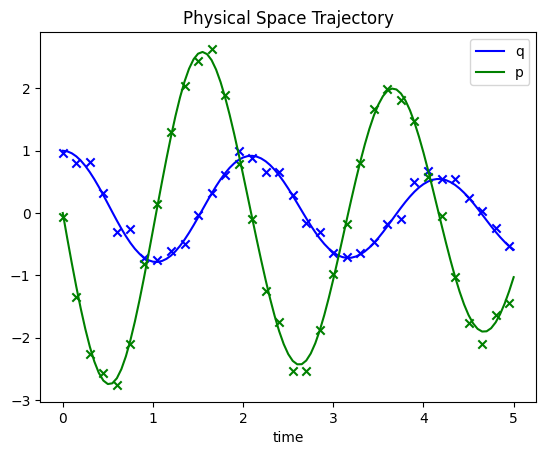

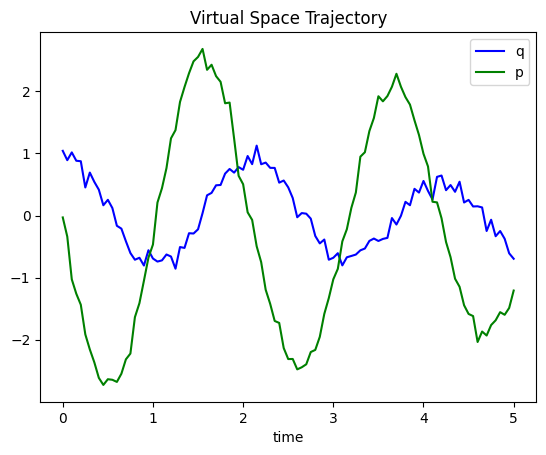

In [34]:
gamma = 0.2
def f_windy_pendulum(t, z):
        q, p = z
        dHdq = grad(H_windy_pendulum, argnum=1)
        dHdp = grad(H_windy_pendulum, argnum=2)
        dHdq = dHdq(t, q, p)
        dHdp = dHdp(t, q, p)
        return [dHdp, -dHdq - gamma * dHdp]

T = 5.0
initial = [1,0]
true_sol = solve_ivp(f_windy_pendulum, [0, T], initial, t_eval=np.linspace(0, T, 101), max_step=T/100.0)
true_y = np.array(true_sol.y)
noisy_y = true_y + 0.1 * np.random.randn(true_y.shape[0], true_y.shape[1])

plt.plot(true_sol.t, true_y[0], color='b', label='q')
plt.scatter(true_sol.t[::3], noisy_y[0][::3], marker='x', color='b')

plt.plot(true_sol.t, true_y[1], color='g', label='p')
plt.scatter(true_sol.t[::3], noisy_y[1][::3], marker='x', color='g')

plt.legend()
plt.title("Physical Space Trajectory")
plt.xlabel('time')
plt.show()

approx_y = true_y + 0.1 * np.random.randn(true_y.shape[0], true_y.shape[1])

plt.plot(true_sol.t, approx_y[0], color='b', label='q')

plt.plot(true_sol.t, approx_y[1], color='g', label='p')

plt.legend()
plt.title("Virtual Space Trajectory")
plt.xlabel('time')
plt.show()

/workspace/lmclennan/HamiltonianLearning/RGH-Net/scripts/visualize/visualize.py:176: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


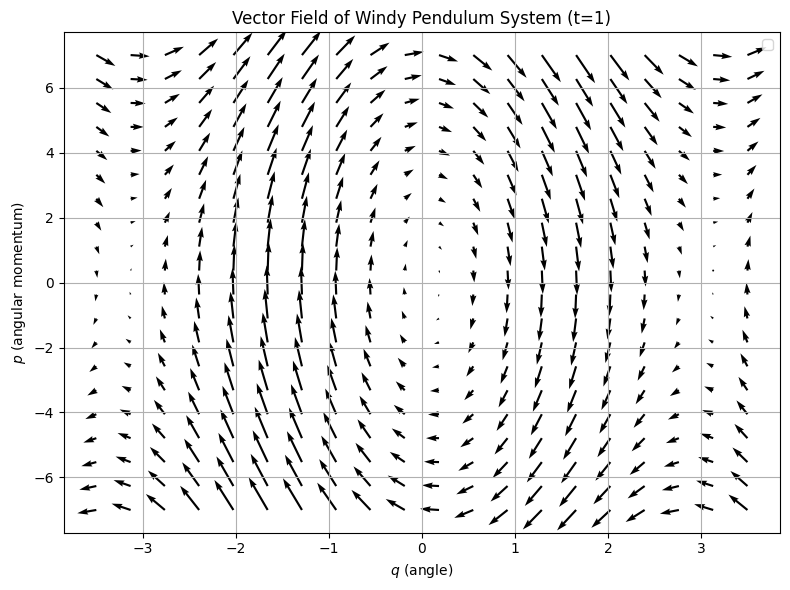

In [33]:
plot_vector_field(
    qs = np.linspace(-3.5, 3.5, 20),
    ps = np.linspace(-7, 7, 20),
    energy_func= lambda q,p : H_windy_pendulum(1.0,q,p),
    title="Vector Field of Windy Pendulum System (t=1)",
    q_spec_label="(angle)",
    p_spec_label="(angular momentum)",
    gamma= 0.2,
    # seed_points= [[-7.5,0], [-1.0,0], [1.0,0], [7.5,0], [-5, 5], [5, -5]],
    seed_points = [[-2.5,0], [-2,0], [-1.5,0], [-1,0], [-0.5, 0]],
    # quiver_scale = 50.0,
    save_fig=False,
    figure_path='../visualizations/windy_pendulum_phase_plot'
)